In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

from findpoint import findpoint
import ModelEvaLib as me

In [2]:
chemfile = xr.open_dataset('F:/Data/case_anqing/compressed_chem.nc')

O3 = chemfile.O3
NO2 = chemfile.NO2

lat = chemfile.latitude
lon = chemfile.longitude

com = O3 + NO2

In [23]:
sites = pd.read_excel('./obsdata/sites.xlsx',usecols=[2,3,4,5],index_col=1)
sitename = sites.index

lono = sites['经度']
lato = sites['纬度']

xls1 = pd.read_excel('./obsdata/O3.xlsx',index_col=0)
xls2 = pd.read_excel('./obsdata/NO2.xlsx',index_col=0)
xls1 = xls1.interpolate(axis=0,method='linear')
xls2 = xls2.interpolate(axis=0,method='linear')
obsO3 = xls1.loc[O3.time.values]
obsNO2 = xls2.loc[NO2.time.values]

df=obsO3+obsNO2

In [5]:
x_index=[]
y_index=[]

for name in sitename:
    out_x, out_y = findpoint(lono[name],lato[name],com)
    x_index.append(out_x)
    y_index.append(out_y)
nr = com.isel(x=x_index, y=y_index)

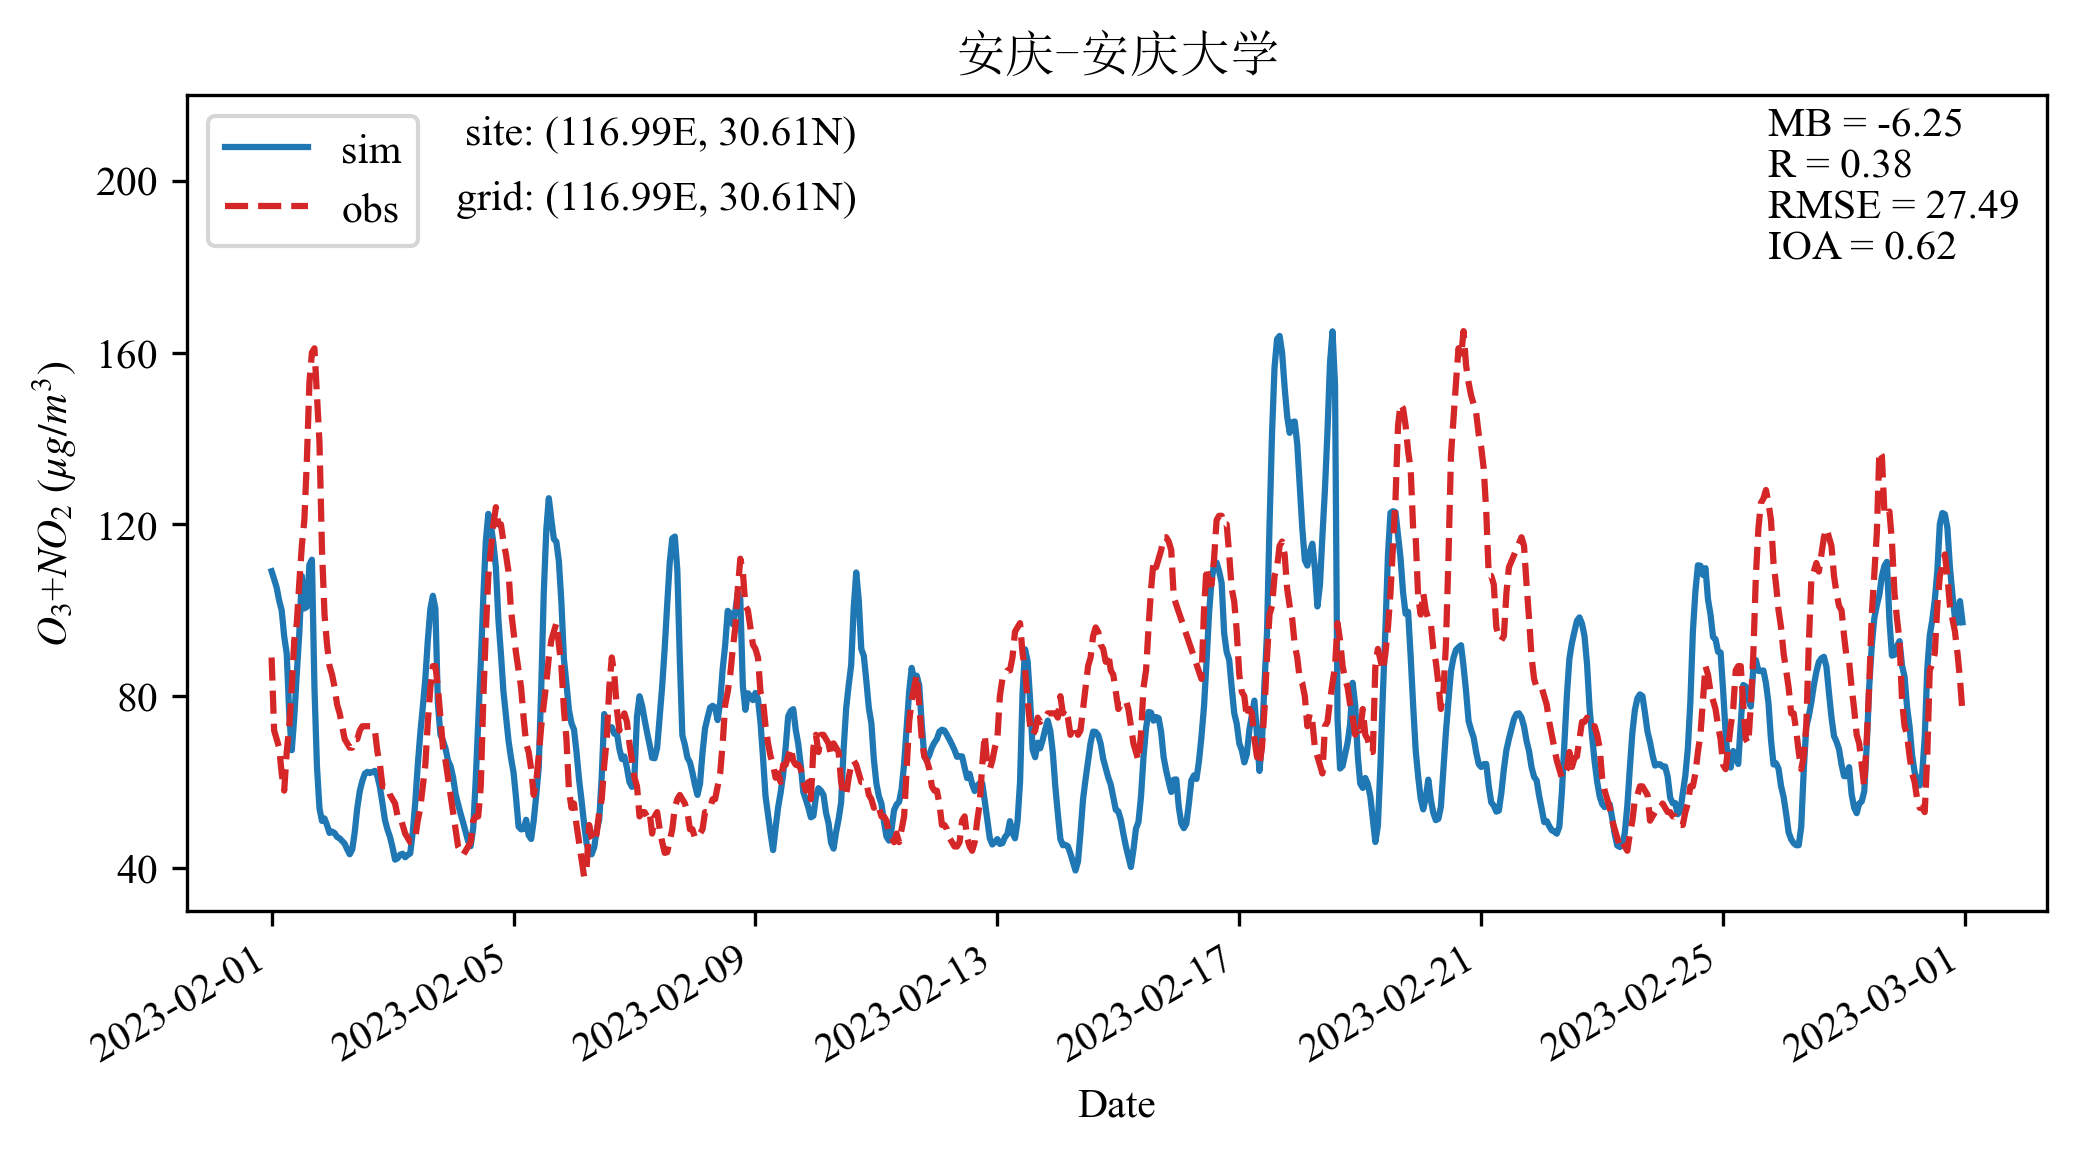

In [26]:
name = '安庆大学'
city = '安庆'
isite = 14

fig = plt.figure(figsize=(8,4),dpi=300)
ax = fig.subplots(1,1)

sim = nr[:,0,isite,isite]
obs = df[isite]

sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')

mb = np.array(np.mean(sim)-np.mean(obs))
r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
rmse = me.cal_RMSE(obs,sim.data)
ioa = me.cal_IOA(obs,sim.data)

ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

ax.legend(loc=2)
ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
ax.set_yticks(np.arange(0,201,40))
ax.set_ylim(30,220)
ax.set_ylabel('$O_3$+$NO_2$ ($\mu$$g/m^3$)')
ax.set_xlabel('Date')

plt.show()

In [27]:
isite = 0
for name in sitename:
    fig = plt.figure(figsize=(8,4),dpi=300)
    ax = fig.subplots(1,1)
    sim = nr[:,0,isite,isite]
    obs = df[isite]
    city = sites['城市'][isite]
    
    sim.plot(ax=ax,linestyle='-',label='sim',color='tab:blue')
    obs.plot(ax=ax,linestyle='--',label='obs',color='tab:red')
    
    mb = np.array(np.mean(sim)-np.mean(obs))
    r = pd.DataFrame({'A':sim,'B':obs}).corr().iloc[0,1]
    rmse = me.cal_RMSE(obs,sim.data)
    ioa = me.cal_IOA(obs,sim.data)
    
    ax.text(x=0.85,y=0.95,s='MB = '+str(f"{mb:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.9,s='R = '+str(f"{r:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.85,s='RMSE = '+str(f"{rmse:.2f}"),ha='left',transform=ax.transAxes)
    ax.text(x=0.85,y=0.8,s='IOA = '+str(f"{ioa:.2f}"),ha='left',transform=ax.transAxes)

    ax.legend(loc=2)
    ax.set_title(city+'-'+name,fontdict={'fontfamily':'SimSun'})
    loctxt = 'site: ('+str(f"{lono[name]:.2f}")+'E, '+str(f"{lato[name]:.2f}")+'N)'
    gridtxt = 'grid: ('+str(f"{sim.longitude.data:.2f}")+'E, '+str(f"{sim.latitude.data:.2f}")+'N)'
    ax.text(x=0.36,y=0.94,s=loctxt,ha='right',transform=ax.transAxes)
    ax.text(x=0.36,y=0.86,s=gridtxt,ha='right',transform=ax.transAxes)
    ax.set_yticks(np.arange(0,201,40))
    ax.set_ylabel('$O_3$+$NO_2$ ($\mu$$g/m^3$)')
    ax.set_xlabel('Date')
    ax.set_ylim(30,220)
    
    path = 'F:/Data/case_anqing/figure/February/逐站点/多市O3NO2/'
    plt.savefig(path+city+'-'+name+'.png')
    
    isite += 1